#### 사회 연결망 분석(Social Network Analysis)
+ 분석 대상 및 분석 대상들간 관계를 연결망 구조로 표현하고, 이를 계량적으로 제시하는 분석 기법
+ 사람, 장소, 물품 등의 객체간 관계를 분석하는 데 효과적이며, 주로 친구관계, 전력공급 등을 분석하는 데 사용



## 의미 연결망 분석(Semantic Network Analysis)
+ 사회 연결망 분석을 텍스트 내 단어간 관계에 적용한 것
+ 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주하고, 이 연결 관계들을 분석

In [1]:
### n_gram
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize, bigrams, ngrams

s = 'I love data science and deep learning'
tokens = word_tokenize(s)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)
quagram = ngrams(tokens, 4)

bigram_list = [x for x in bigram]
trigram_list = [x for x in trigram]
quagram_list = [x for x in quagram]


print(bigram_list)
print(trigram_list)
print(quagram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]
[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


### 어휘 동시 출현 빈도의 계수화
* 동시출현(co-occurrence) : 두개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것
* 단어간 동시출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시출현 빈도는 window라는 지정 범위 내에서 동시출현한 어휘를 확률 등으로 계수화 가능
* ex) 단어 뒤 잘못된 단어가 왔을 때 동시출현 빈도가 높은 단어로 교정 가능


+ 어휘 동시출현 빈도 행렬은 하나하나 측정할 수도 있지만, bigram 개수를 정리하면 편리하게 만들어 볼 수 있음
+ nltk의 ConditionalFreqDist 함수를 통해 문맥별 단어 빈도를 쉽게 측정 가능

In [2]:
from nltk import ConditionalFreqDist

s = ['I love data science and deep learning',
     'I love science',
     'I know this code']
tokens = [word_tokenize(x) for x in s]

bigram = [bigrams(x) for x in tokens]

token = []
for i in bigram:
    token += ([x for x in i])

cfd = ConditionalFreqDist(token)

print(cfd.conditions())
for i in cfd.conditions():
    print(cfd[i])

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
<FreqDist with 2 samples and 3 outcomes>
<FreqDist with 2 samples and 2 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>
<FreqDist with 1 samples and 1 outcomes>


In [3]:
print(cfd['I'].most_common())  #'I'와 동시출현한 단어와 빈도수 튜플의 리스트
print(cfd['I']['love'])        #'I'와 'love'가 동시출현한 빈도수

[('love', 2), ('know', 1)]
2


In [4]:
import numpy as np

freq_matrix = []

for i in cfd.keys():   #dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)

freq_matrix = np.array(freq_matrix)
print(freq_matrix)  

[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


In [5]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


+ 동시출현 빈도 행렬은 인접행렬로도 간주할 수 있음
+ networks 라이브러리를 이용해 그래프로 시각화 가능

In [6]:
#!pip install networkx
import networkx as nx

g = nx.from_pandas_adjacency(df)

print(g.nodes())
print(g.edges())   

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


{'weight': 2}
{'weight': 1}


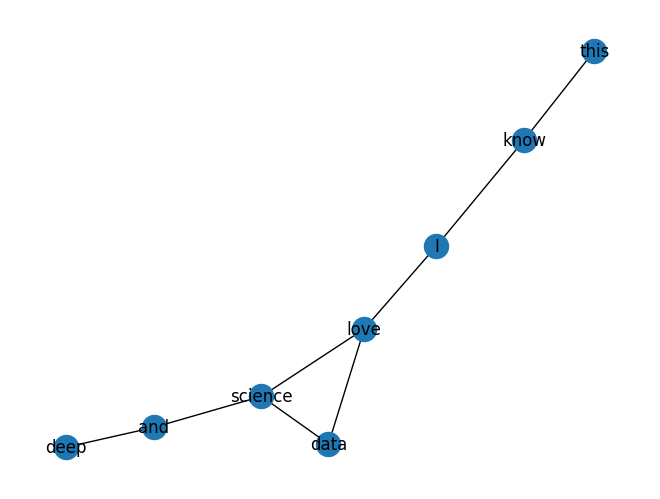

In [7]:
#각 엣지에 접근해보면 가중치에 각 단어간 빈도가 사용된 것을 확인 가능
print(g.edges()[('I', 'love')])
print(g.edges()[('I', 'know')])

nx.draw(g, with_labels=True)

+ 어휘 동시출현 빈도를 계산하면 어휘 동시출현 확률까지 측정 가능
+ nltk의 ConditionalProbDist 이용

In [8]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)

prob_matrix = []

for i in cpd.keys():   #dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)
print(prob_matrix)  

df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap='coolwarm')

[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


,I,love,data,science,and,deep,know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


+ 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용 시 부정확한 결과를 얻을 수도 있음

In [9]:
prob_g = nx.from_pandas_adjacency(df)

print(prob_g.nodes())
print(prob_g.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [10]:
print(g.edges()[('I', 'love')])
print(g.edges()[('I', 'know')])
print()
print(prob_g.edges()[('I', 'love')])
print(prob_g.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}

{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


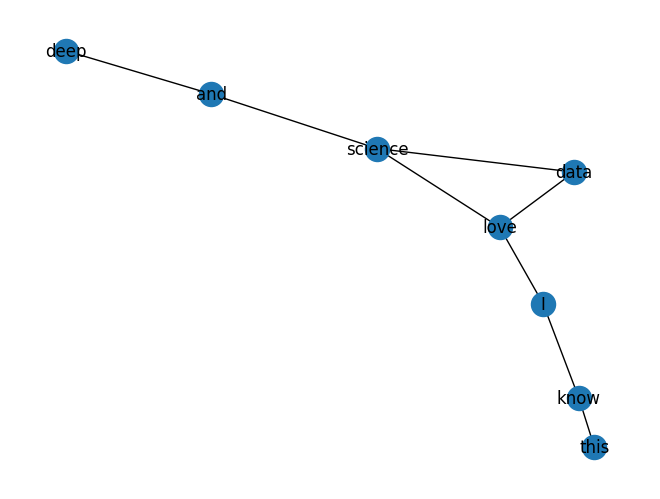

In [11]:
nx.draw(prob_g, with_labels=True)

### 중심성(centrality) 지수
+ 중심성 : 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결정도, 중요도 등을 알 수 있음
+ 연결망 분석에서 가장 많이 주목하는 속성이 바로 중심성 지수
+ 나타내는 특징에 따라 연결중심성, 매개중심성, 근접중심성, 위세중심성으로 구분

#### 1. 연결중심성(degree centrality)
+ 연결중심성은 가장 기본적이고 직관적으로 중심성을 측정하는 지표
+ 텍스트에서 다른 단어와의 동시출현 빈도가 많은 특정 단어는 연결중심성이 높다고 볼 수 있음
+ 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에, 여러 방법으로 표준화
+ 주로 (특정 노드 i와 직접적으로 연결된 노드수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산
+ 직접적으로 연결된 노드란 서로 엣지관계인 노드를 의미
+ 간적접으로 연결된 노드란 서로 엣지관계는 아니지만 다른 노드/엣지에 의해 도달할 수 있는 노드를 의미
+ networkx의 degree_centrality() 함수를 통해 계산 가능

In [12]:
nx.degree_centrality(g)

{'I': 0.2857142857142857,
 'love': 0.42857142857142855,
 'data': 0.2857142857142857,
 'science': 0.42857142857142855,
 'and': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'know': 0.2857142857142857,
 'this': 0.14285714285714285}

#### 2. 위세중심성(eigenvector centrality)
+ 연결된 상대 단어의 중요성에 가중치를 두는 방법
+ 중요한 단어와 많이 연결됐다면 위세중심성이 높아지게 됨
+ 위세중심성은 고유벡터로서 인접해있는 노드의 위세점수와 관련되어있기 때문에 직접 계산하기는 어려움
+ networkx의 eigenvector_centrality() 함수를 통해 계산 가능

In [13]:
nx.eigenvector_centrality(g, weight='weight')  #어휘 동시출현 빈도를 가중치로

{'I': 0.5055042648573065,
 'love': 0.6195557831651917,
 'data': 0.35703593885196566,
 'science': 0.39841035839294925,
 'and': 0.15933837227495717,
 'deep': 0.055886131430398216,
 'know': 0.20216573350291445,
 'this': 0.07090581134630142}

#### 3. 근접중심성(closeness centrality)
+ 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 방법
+ 연결중심성은 직접적으로 연결된 노드만 측정했다면, 근접중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
+ networkx의 closeness_centrality() 함수를 통해 계산 가능

In [15]:
nx.closeness_centrality(g, distance='weight')  #어휘 동시출현 빈도를 가중치로

{'I': 0.35,
 'love': 0.4375,
 'data': 0.3684210526315789,
 'science': 0.4117647058823529,
 'and': 0.3333333333333333,
 'deep': 0.25925925925925924,
 'know': 0.2916666666666667,
 'this': 0.23333333333333334}

#### 4. 매개중심성(betweeness centrality)
+ 한 단어가 단어들과의 연결망을 구축하는 데 얼마나 도움을 주는지 측정하는 방법
+ 매개중심성이 높으면 빈도수가 적더라도 단어간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
+ 매개중심성은 모든 노드간 최단경로에서 특정노드가 등장하는 횟수로 측정하며, 표준화를 위해 최댓값인 (n-1)*(n-2)/2로 나눔
+ networkx의 (current_flow_)betweenness_centrality() 함수를 통해 계산 가능

In [17]:
nx.betweenness_centrality(g), nx.current_flow_betweenness_centrality(g)

({'I': 0.47619047619047616,
  'love': 0.5714285714285714,
  'data': 0.0,
  'science': 0.47619047619047616,
  'and': 0.2857142857142857,
  'deep': 0.0,
  'know': 0.2857142857142857,
  'this': 0.0},
 {'I': 0.47619047619047616,
  'love': 0.6190476190476188,
  'data': 0.19047619047619013,
  'science': 0.5396825396825397,
  'and': 0.2857142857142857,
  'deep': 2.1147105230955362e-16,
  'know': 0.28571428571428603,
  'this': 4.229421046191072e-17})

### 페이지 랭크(PageRank)
+ WWW 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
+ 서로간 인용과 참조로 연결된 임의의 묶음에 적용 가능
+ 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기반

In [18]:
nx.pagerank(g)

{'I': 0.1536831077679558,
 'love': 0.19501225218917406,
 'data': 0.10481873412175656,
 'science': 0.15751225722745082,
 'and': 0.12417333539164832,
 'deep': 0.07152392879557615,
 'know': 0.1224741813421488,
 'this': 0.07080220316428934}

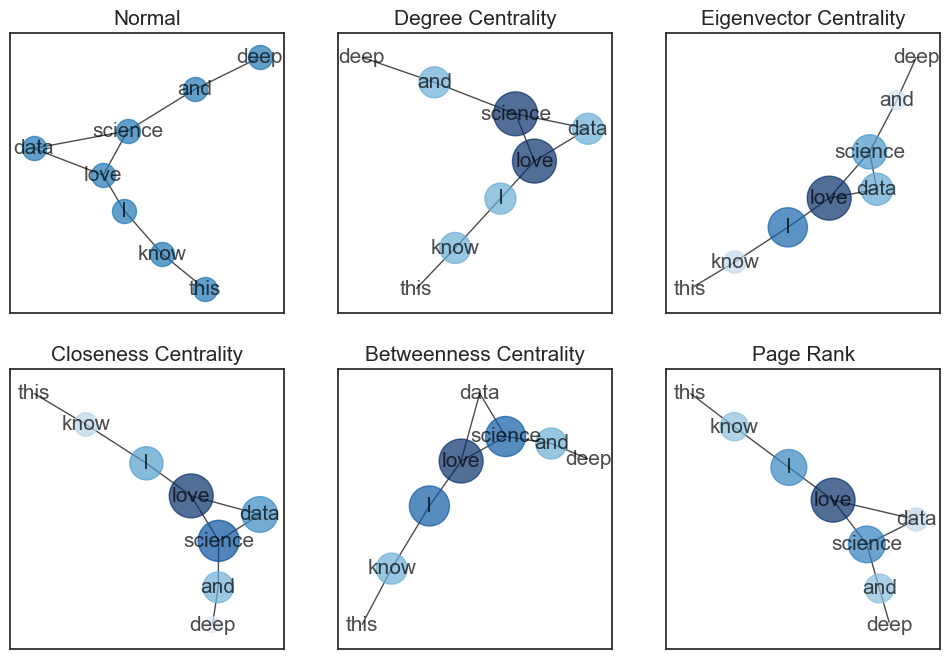

In [23]:
#중심성 종류에 따른 시각화
def get_node_size(node_values):
    n_size = np.array([v for v in node_values])
    n_size = 1000 * (n_size-min(n_size)) / (max(n_size)-min(n_size))   #minmax scale한 결과와 같아짐
    return n_size

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(g).values()
ec = nx.eigenvector_centrality(g, weight='weight').values()
cc = nx.closeness_centrality(g, distance='weight').values()
bc = nx.betweenness_centrality(g).values()
pr = nx.pagerank(g).values()

plt.figure(figsize=(12,8))
plt.axis('off')
plt.subplot(2,3,1)
plt.title('Normal', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(2,3,2)
plt.title('Degree Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(dc), node_size=get_node_size(dc))

plt.subplot(2,3,3)
plt.title('Eigenvector Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(ec), node_size=get_node_size(ec))

plt.subplot(2,3,4)
plt.title('Closeness Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(cc), node_size=get_node_size(cc))

plt.subplot(2,3,5)
plt.title('Betweenness Centrality', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(bc), node_size=get_node_size(bc))

plt.subplot(2,3,6)
plt.title('Page Rank', fontsize=15)
nx.draw_networkx(g, font_size=15, alpha=0.7, cmap=plt.cm.Blues,
                 node_color=list(pr), node_size=get_node_size(pr));

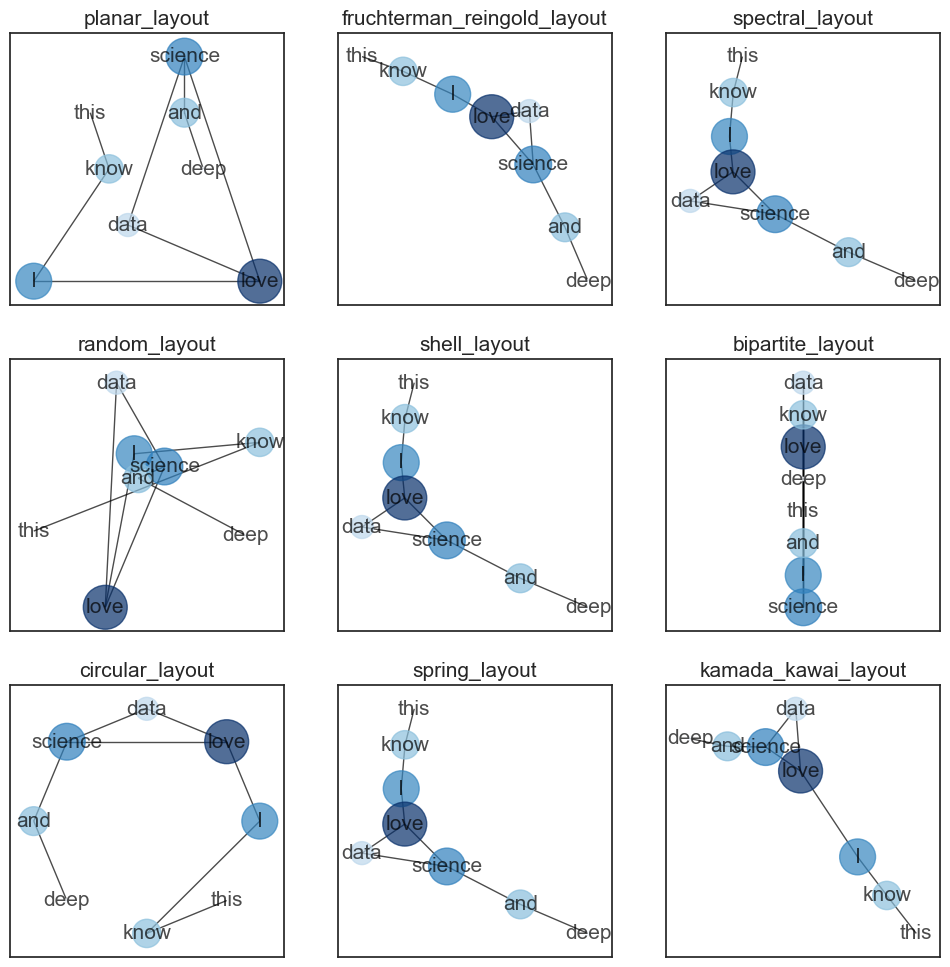

In [29]:
#시각화 방법(layout) 비교
pl = nx.planar_layout(g)
frl = nx.fruchterman_reingold_layout(g)
sl = nx.spectral_layout(g)
rl = nx.random_layout(g)
sl = nx.shell_layout(g)
bl = nx.bipartite_layout(g, g.nodes())
cl = nx.circular_layout(g)
sl = nx.spring_layout(g)
kkl = nx.kamada_kawai_layout(g)

pos = [pl, frl, sl, rl, sl, bl, cl, sl, kkl]
titles = ['planar_layout', 'fruchterman_reingold_layout', 'spectral_layout',
          'random_layout', 'shell_layout', 'bipartite_layout',
          'circular_layout', 'spring_layout', 'kamada_kawai_layout']
option = {'font_size':15, 
          'alpha':0.7, 
          'cmap':plt.cm.Blues,
          'node_color':list(pr), 
          'node_size':get_node_size(pr)}

plt.figure(figsize=(12,12))
plt.axis('off')

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(titles[i], fontsize=15)
    nx.draw_networkx(g, pos=pos[i], **option)